<a href="https://colab.research.google.com/github/WeiningKan/Applied-Spatial-Statistics-Course-Project-Code/blob/main/A2_WeiningKan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
Due date/time: Feb 23 Wed 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and instructions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit a notebook named A2_your_name.ipynb on Canvas.

# Data and instructions

In this assignment, we will be performing Point Pattern Analysis on crime (offenses) location data in Tempe, Arizona. I was about to find data available for FL but FL does not publish address level crime data.

As a first step. the dataset needs to be downloaded from [Here](https://data.tempe.gov/datasets/tempegov::general-offenses-open-data/explore?location=33.380547%2C-111.897684%2C12.33). You can download in either geojson or shapefile format.

Upload to Google Colab in your favorite way and read it in using `geopandas`.

The data has a year column `OccurrenceYear`. Please use `geopandas` to subset your data JUST for a particular year (e.g., 2018). For some years, there might be spatial outliers that are apparently outside of the main cluster and you need to remove them. For some other years, there are no outliers.

All the subsequent analysis are based on this single-year crime data.


First you need to install the two packages that are not available in Google Colab by running the below code.

In [ ]:
pip install -q contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.7 MB/s eta 0:00:00


**Note:** If you work with your own local python env and have higher version of `numpy or pointpats`. Please see this [example](https://github.com/Ziqi-Li/GIS5122/blob/main/notebooks/W5%20Point%20Pattern%20Analysis%20Cholera%20(for%20point%20pats%20v2.4.0%20and%20later%20numpy).ipynb).

If you work on Colab, please refer to this [example](https://github.com/Ziqi-Li/GIS5122/blob/main/notebooks/W5%20Point_Pattern_Analysis_Cholera%20(Colab).ipynb), and install the `pointpats` as follows:

In [ ]:
pip install -q https://github.com/Ziqi-Li/pointpats/archive/v2.3.zip

     - 2.8 MB 15.4 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.8 MB/s eta 0:00:00


Then import all the packages needed to run the analysis

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess


In [ ]:
Offense = gpd.read_file("/content/General_Offenses_(Open_Data).geojson")

In [ ]:
Offense.head()

,OBJECTID,PrimaryKey,OccurrenceDatetime,OccurrenceYear,OccurrenceMonth,OccurrenceHour,OccurrenceWeek,OccurrenceDatePart,OccurrenceWeekday,ObfuscatedAddress,...,Longitude,RucrComp,CharacterArea,ReportDistrict,ReportBeat,PostalCode,CensusTractID,ParkName,NeighborhoodName,geometry
0,1,TE201392961,2013-07-28 02:04:00+00:00,2013.0,7.0,2.0,31,28,Sunday,APACHE BLVD / S RURAL RD,...,-111.926285,C,Rio Salado/DT/ASU/NW Neighborhoods,N,14,85281,04013319101,None,None,POINT (-111.92630 33.41478)
1,2,TE201393098,2013-07-28 12:44:00+00:00,2013.0,7.0,12.0,31,28,Sunday,MILL AVE / W ALAMEDA DR,...,-111.939702,C,Alameda,S,19,85282,04013319600,None,None,POINT (-111.93971 33.40012)
2,3,TE201393163,2013-07-28 17:32:00+00:00,2013.0,7.0,17.0,31,28,Sunday,52ND ST / W 4TH ST,...,-111.969634,C,Diablo/Double Butte,N,12,85281,04013319710,None,None,POINT (-111.96965 33.42644)
3,4,TE201390960,2012-01-01 08:00:00+00:00,2012.0,1.0,8.0,1,1,Sunday,5XX E RIVIERA DR,...,-111.930866,C,Alameda,S,19,85282,04013319802,None,Tempe Gardens,POINT (-111.93088 33.38635)
4,5,TE201393242,2013-07-28 22:26:00+00:00,2013.0,7.0,22.0,31,28,Sunday,BASELINE RD / S MCCLINTOCK DR,...,-111.909257,C,Kiwanis/The Lakes,S,22,85282,04013319401,None,None,POINT (-111.90927 33.37844)


In [ ]:
Offense.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
Offense_2018 = Offense[Offense['OccurrenceYear'] == 2018]
Offense_2018

,OBJECTID,PrimaryKey,OccurrenceDatetime,OccurrenceYear,OccurrenceMonth,OccurrenceHour,OccurrenceWeek,OccurrenceDatePart,OccurrenceWeekday,ObfuscatedAddress,...,Longitude,RucrComp,CharacterArea,ReportDistrict,ReportBeat,PostalCode,CensusTractID,ParkName,NeighborhoodName,geometry
29033,29034,TE201818686,2018-02-12 22:00:00+00:00,2018.0,2.0,22.0,7,12,Monday,2XXX E FREMONT DR,...,-111.900109,C,Kiwanis/The Lakes,S,22,85282,04013319402,None,Cole Park,POINT (-111.90012 33.38340)
63712,63713,TE201811608,2018-01-27 23:03:00+00:00,2018.0,1.0,23.0,4,27,Saturday,APACHE BLVD / S MCCLINTOCK DR,...,-111.909113,C,Apache,N,14,85281,04013319104,None,None,POINT (-111.90912 33.41474)
102359,102360,TE201818617,2018-02-10 00:00:00+00:00,2018.0,2.0,0.0,6,10,Saturday,6XX W SESAME ST,...,-111.950202,C,Mills/Emerald,S,21,85283,04013320007,None,Pepperwood,POINT (-111.95021 33.36978)
105405,105406,TE201891239,2018-08-05 09:46:00+00:00,2018.0,8.0,9.0,32,5,Sunday,2XXX E RIO SALADO PKWY,...,-111.896698,C,Apache,N,15,85288,04013318400,None,None,POINT (-111.89671 33.42936)
105427,105428,TE201892001,2018-08-07 09:20:00+00:00,2018.0,8.0,9.0,32,7,Tuesday,1XXX E DON CARLOS AVE,...,-111.905963,C,Apache,N,15,85281,04013319201,None,Alegre Community,POINT (-111.90597 33.41750)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299876,320216,TE2023119884,2018-01-01 00:00:00+00:00,2018.0,1.0,0.0,1,1,Monday,9XX W PARKWAY BLVD,...,NaN,None,Rio Salado/DT/ASU/NW Neighborhoods,N,13,85281,04013318900,None,None,POINT (-111.95244 33.41329)
301314,321654,TE2023602642,2018-03-01 12:00:00+00:00,2018.0,3.0,12.0,9,1,Thursday,1XXX E APACHE BLVD,...,NaN,None,Apache,N,15,85281,04013319202,None,None,POINT (-111.90416 33.41228)
303950,324290,TE2023142785,2018-11-12 19:00:00+00:00,2018.0,11.0,19.0,46,12,Monday,1XXX W RIO SALADO PKWY,...,NaN,None,Diablo/Double Butte,N,12,85281,04013319710,None,None,POINT (-111.96280 33.42897)
304902,325242,TE2023149277,2018-09-01 00:00:00+00:00,2018.0,9.0,0.0,35,1,Saturday,1XX E RIVIERA DR,...,NaN,None,Alameda,S,19,85282,04013319802,None,None,POINT (-111.93699 33.38625)


In [ ]:
coords = np.array(Offense_2018.geometry.apply(lambda geom: (geom.x, geom.y)).tolist())


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=10).fit(coords)  # Adjust parameters as necessary
labels = db.labels_

In [ ]:
outliers = labels == -1
cleaned_data = year_data[~outliers]

NameError: name 'labels' is not defined

## Question 1 (50%)

**Part 1:** Use Kernel Density Estimation to visualize the density distribution of crime incidents in the city of Tempe (AZ).
Please choose proper **bandwidth** and color parameters. Add a basemap image underneath using `contextily`. (30%)

**Part 2**: Write 2-3 sentences describing the pattern you see and indidating where are the places that are having the highest crime density (you may further refer to google maps for additional context of the area) (20%)

####**Part 1**

<Axes: xlabel='None', ylabel='None'>

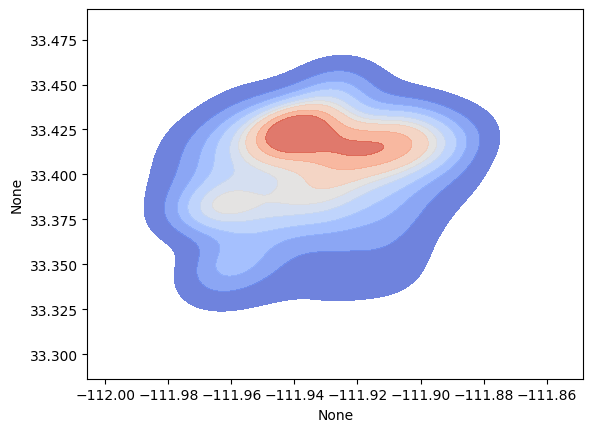

In [ ]:
sns.kdeplot(data=Offense_2018,
            x=Offense_2018.geometry.x,
            y=Offense_2018.geometry.y,
            bw_method=0.4,
            fill=True,
            cmap="coolwarm",
            alpha=0.8)

<Axes: xlabel='None', ylabel='None'>

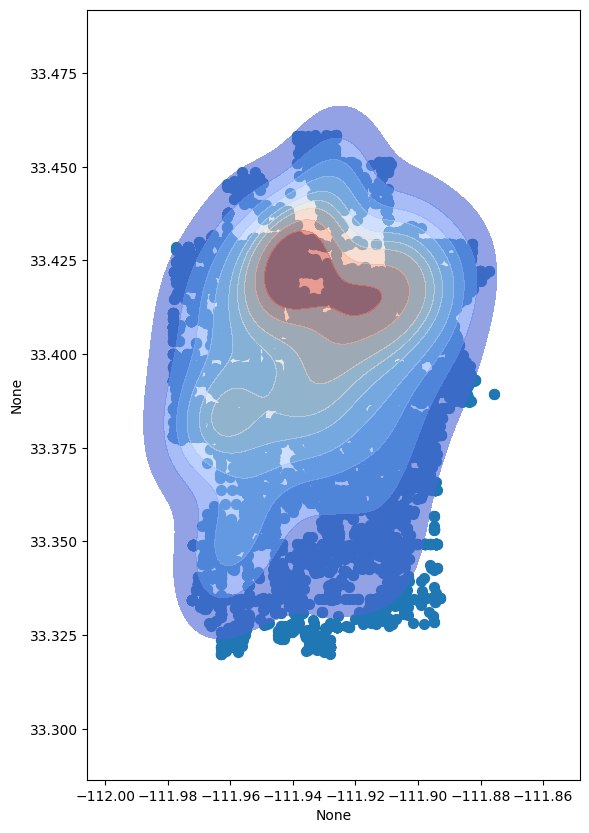

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
Offense_2018.plot(ax=ax, markersize = 50)


#4th layer
sns.kdeplot(ax=ax, data=Offense_2018,
            x=Offense_2018.geometry.x,
            y=Offense_2018.geometry.y,
            bw_method=0.4,
            fill=True,
            cmap="coolwarm",
            alpha=0.6)

## Question 2 (50%)
**Part 1.** Use the `pointpats` library to calculate and visualize the G function curve and K function curve. (20%)

**Part 2.** Write 2-3 sentences to describe and interpret both plots, and indicate whether the pattern is statistically clustered, random or regular. (20%)

**Part 3.** Use 1-2 sentences to briefly describe the methodological difference between the G function and K function. (10%)